In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
arquivo = 'C:/Users/dshn5/Documents/Cursos/Pós-Graduação/Especialização/13_TCC/Dados/household_power_consumption.txt' # caminho

In [3]:
dados = pd.read_csv(arquivo, sep = ";") # carrega o arquivo com o pandas

In [4]:
# ANÁLISE EXPLORATÓRIA
dados.head() # visualização das 5 primeiras linhas

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
dados.shape # verificação das linhas x colunas do dataframe

(2075259, 9)

In [6]:
dados.dtypes # verificação do tipo de cada coluna

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [7]:
del dados['Time']

In [8]:
dados['Date'] = pd.to_datetime(dados['Date'], format = '%d/%m/%Y')
dados['Global_active_power'] = pd.to_numeric(dados['Global_active_power'], errors='coerce')
dados['Global_reactive_power'] = pd.to_numeric(dados['Global_reactive_power'], errors='coerce')
dados['Voltage'] = pd.to_numeric(dados['Voltage'], errors='coerce')
dados['Global_intensity'] = pd.to_numeric(dados['Global_intensity'], errors='coerce')
dados['Sub_metering_1'] = pd.to_numeric(dados['Sub_metering_1'], errors='coerce')
dados['Sub_metering_2'] = pd.to_numeric(dados['Sub_metering_2'], errors='coerce')

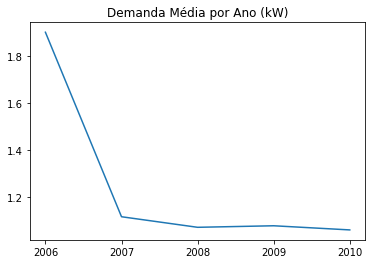

In [9]:
anos = [2006, 2007, 2008, 2009, 2010]
x = dados['Date'].dt.year
y = dados.groupby(dados['Date'].dt.year)['Global_active_power'].transform('mean')
plt.plot(x, y)
plt.xticks(anos)
plt.title("Demanda Média por Ano (kW)")
plt.show()

In [10]:
del dados['Date']

In [11]:
dados.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
dados.dtypes # verificação do tipo de cada coluna

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [13]:
dados.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [14]:
dados.corr(method = 'pearson') # verificando a correlação das colunas entre elas

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [15]:
dados = dados[dados['Voltage'] > 0] # pela inspeção do dataframe, sabe-se que existem valores negativos nessa coluna

In [16]:
dados = dados[dados['Global_active_power'] != None]

In [17]:
dados.dropna(inplace=True)

In [18]:
# verificação da existência de infinitos
dados['Global_active_power'].sum()
dados['Global_reactive_power'].sum()
dados['Voltage'].sum()
dados['Global_intensity'].sum()
dados['Sub_metering_1'].sum()
dados['Sub_metering_2'].sum()
dados['Sub_metering_3'].sum()

13235167.0

In [19]:
dados.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [20]:
X = dados.iloc[:,4:]
Y = dados['Global_active_power'].values

In [21]:
# Gerando autovalores e autovetores
corr = np.corrcoef(X, rowvar = 0)
autovalores, autovetores = np.linalg.eig(corr) # criando autovalores e autovetores

In [22]:
print(autovalores) # como não tem nenhuma variável próximo de zero, então não há multicolinearidade

[1.16036387 0.89210422 0.94753191]


(array([1.986801e+06, 5.332000e+03, 4.308000e+03, 5.834000e+03,
        4.469700e+04, 1.365000e+03, 2.950000e+02, 1.370000e+02,
        4.690000e+02, 4.200000e+01]),
 array([ 0. ,  8.8, 17.6, 26.4, 35.2, 44. , 52.8, 61.6, 70.4, 79.2, 88. ]),
 <a list of 10 Patch objects>)

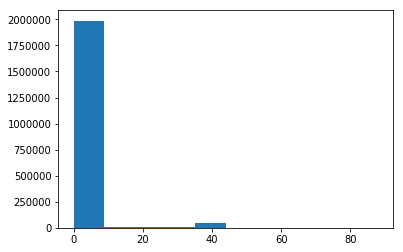

In [23]:
plt.hist(dados['Sub_metering_1'])

(array([1.991587e+06, 2.981000e+03, 1.032900e+04, 1.199800e+04,
        2.673100e+04, 1.390000e+03, 3.500000e+02, 5.440000e+02,
        1.363000e+03, 2.007000e+03]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <a list of 10 Patch objects>)

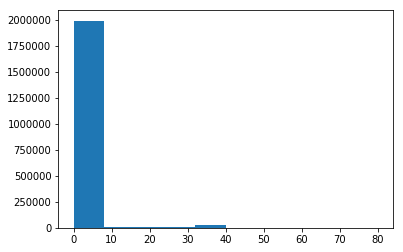

In [24]:
plt.hist(dados['Sub_metering_2'])

(array([1327865.,    5805.,    5887.,   31317.,    6530.,  525587.,
         126722.,    2078.,    2797.,   14692.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

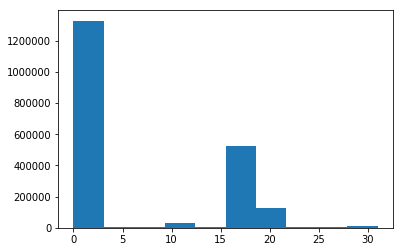

In [25]:
plt.hist(dados['Sub_metering_3'])

In [26]:
# Aplicando padronização
modelo_lr = linear_model.LinearRegression() # cria o objeto
standardization = StandardScaler() # chamando a função
stand_coef_linear_reg = make_pipeline(standardization, modelo_lr) # faz a padronização e cria o modelo
stand_coef_linear_reg.fit(X, Y) # aplica a padronização depois treina X e Y

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [27]:
for coef, var in sorted(zip(map(abs, stand_coef_linear_reg.steps[1][1].coef_), dados.columns[4:]), reverse = True):
    print('%6.3f %s' % (coef, var))

 0.600 Sub_metering_3
 0.429 Sub_metering_1
 0.387 Sub_metering_2


In [28]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 42) # dividindo treino/teste

In [29]:
# Cria o modelo
modelo = LinearRegression()

In [30]:
# Treina o modelo
modelo2 = modelo.fit(X_treino, Y_treino)

In [31]:
# Calcula a métrica R2 do modelo
r2_score(Y_teste, modelo2.fit(X_treino, Y_treino).predict(X_teste))

0.7207236901312478

In [32]:
modelo2.coef_ #coeficientes

array([0.06978936, 0.06646777, 0.0710913 ])

In [33]:
modelo2.intercept_ #constante

0.46827865610712505

In [36]:
# FAZENDO PREVISÕES
vetor = [dados['Sub_metering_1'].mean(), dados['Sub_metering_2'].mean(), dados['Sub_metering_3'].mean()]

In [37]:
# TRANSFORMANDO A LISTA EM ARRAY
vetor_array = np.array(vetor)

In [38]:
print(vetor_array)

[1.12192331 1.29851997 6.45844736]


In [39]:
# TRANSFORMANDO O ARRAY EM MATRIZ, POIS O MÉTODO PREDICT REQUER ESTA FORMA DE ENTRADA DE DADOS
vetor_array = vetor_array.reshape(1, -1)

In [40]:
print(modelo2.predict(vetor_array))

[1.09202613]


In [47]:
print("Valores de Entrada = {}, Predição = {}" .format(vetor_array[0], modelo2.predict(vetor_array)[0]))

Valores de Entrada = [1.12192331 1.29851997 6.45844736], Predição = 1.0920261317249582
